# Análisis de Ventas de Videojuegos  

Este análisis explora las ventas de videojuegos según diferentes criterios como plataforma, género, y región. También examinamos la relación entre reseñas y ventas, además de realizar pruebas de hipótesis.  



## 📌 Índice  

1. [Preparación de Datos](#Preparar-los-datos)  
   - [Reemplazo de Nombres de Columnas](#Remplazar-los-nombres-de-las-columnas-(minúsculas))  
   - [Conversión de Tipos de Datos](#conversión-de-tipos-de-datos)  
   - [Manejo de Valores Ausentes](#Tratar-los-valores-ausentes)  
   - [Cálculo de Ventas Totales](#Calculo-de-ventas-totales)  

2. [Análisis de los Datos](#Analisis-de-los-Datos)  
   - [Número de Juegos por Año](#Número-de-juegos-lanzados-por-año)  
   - [Ventas por Plataforma](#Ventas-por-plataforma)  
   - [¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas
en desaparecer?](#¿Cuánto-tardan-generalmente-las-nuevas-plataformas-en-aparecer-y-las-antiguas-en-desaparecer?)  
   - [Periodo en el que se tomaran los datos](#Periodo-en-el-que-se-tomaran-los-datos)      
   - [Diagrama de Caja](#Ventas-globales-de-todos-los-juegos,-desglosados-por-plataforma)  
   - [Relación entre Reseñas y Ventas](#Relación-entre-reseñas-y-ventas) 

3. [Perfil de Usuario por Región](#Perfil-de-usuario-para-cada-region)  
   - [Clasificaciones ESRB y ventas](#Clasificaciones-ESRB-y-ventas)    

5. [Pruebas de Hipótesis](#Pruebas-de-hipótesis)  
   - [Calificaciones Promedio de Usuarios: Xbox One vs PC](#Calificaciones-Promedio-de-Usuarios:-Xbox-One-vs-PC)  
   - [Calificaciones Promedio de Usuarios: Acción vs Deportes](#Calificaciones-promedio-de-usuarios-para-los-géneros-de-Acción-y-Deportes)  

6. [Conclusiones](#Conclusión-general)  
 

In [6]:
# Importando las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
games = pd.read_csv("dataset/games.csv")

In [8]:
print(games.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [9]:
display(games.sample(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12571,Smile PreCure! Let's Go! Marchen World,3DS,2012.0,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN
8375,Final Fantasy V,PS,1998.0,Role-Playing,0.00,0.00,0.16,0.01,NaN,NaN,NaN
9328,Bratz,GBA,2002.0,Platform,0.10,0.04,0.00,0.00,NaN,tbd,E
9383,Castrol Honda Superbike Racing,PS,1998.0,Racing,0.07,0.05,0.00,0.01,NaN,NaN,NaN
15790,This War of Mine,PS4,2016.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
16041,Iron Soldier 3,PS,1999.0,Simulation,0.01,0.01,0.00,0.00,NaN,NaN,NaN
3431,Tokimeki Memorial: Forever with You,PS,1995.0,Simulation,0.00,0.00,0.55,0.04,NaN,NaN,NaN
7896,Nobunaga no Yabou: Souzou,PS3,2013.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
1555,Atlantis,2600,1981.0,Shooter,1.18,0.08,0.00,0.01,NaN,NaN,NaN


# Preparar los datos

## Remplazar los nombres de las columnas (minúsculas)

In [10]:
# Remplanzado el nombre de las columnas por minusculas 

games.columns = games.columns.str.lower()
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Para facilitar el manejo de los datos, cambié los nombres de las columnas a minúsculas. Esto evita errores al acceder a las columnas y hace que el código sea más consistente.

## Conversion de tipos de datos

### columna user_score

In [11]:
# Checando los valores con tbd
display(games[games['user_score'] == 'tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [12]:
# Para poder pasarlo a NaN debemos de especificar el parametro de erros como 'coerce' para converir valores no numéricos en NaN
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')

In [13]:
# Convertimos la celda a tipo numerico 
games['user_score'] = pd.to_numeric(games['user_score'])

In [14]:
# Comprobando los resultados
print(games['user_score'].dtype)

float64


Para facilitar el manejo de los datos, cambié los nombres de las columnas a minúsculas. Esto evita errores al acceder a las columnas y hace que el código sea más consistente.Se convierte a float para permitir operaciones matemáticas y análisis estadístico. Los valores "tbd" se convierten en NaN porque no representan un valor numérico.

### Columna year_of_release

Actualmente es de tipo float64, pero debería ser de tipo int si los años son enteros.

In [15]:
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce')

In [16]:
# Comprobando
print(games['year_of_release'].dtype)

float64


Aunque los años deberían ser enteros, decidí convertirlos a float64 para manejar mejor los valores ausentes. Esto no afecta el análisis, ya que los años siguen siendo números.

##  Tratar los valores ausentes

### Columna genre y name

In [17]:
# columna name
display(games[games['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [18]:
# columna genre
display(games[games['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Como la fila 14244 no contiene informacion relevante la podemos eliminar

In [19]:
games = games.drop(index=14244)  # Esto elimina solo la fila con índice 659


En el caso de la fila 659 la podemos mantener por las ventas que tuvieron en na_sales y eu_sales

In [20]:
games.loc[659, 'name'] = "Unknown"
games.loc[659, 'genre'] = "Unknown"


Encontramos algunas filas donde el nombre del juego o el género estaban ausentes. Decidí rellenar estos valores con "Unknown" para mantener la integridad de los datos. Esto es útil porque no podemos imputar valores categóricos como el nombre o el género.

### Columnas crtitic_score, user_score y rating

In [21]:
# Filtrar el dataframe donde user_score, critic_score y rating son NaN
filtered_games = games[games['user_score'].isna() & games['critic_score'].isna() & games['rating'].isna()]

# Mostrar el dataframe filtrado
display(filtered_games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Estos valores ausentes los dejé como NaN porque representan una cantidad significativa de datos. Rellenarlos con valores arbitrarios (como la media o la mediana) podría sesgar los resultados. Además, los valores ausentes en estas columnas podrían deberse a que algunos juegos no fueron evaluados por críticos o usuarios, o no tienen una clasificación ESRB.

### Columna year_of_release

In [22]:
display(games[games['year_of_release'].isna()])



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [23]:
# Al no ser tantos datos podemos colocar su año como valor desconocido
games['year_of_release'].fillna("Unknown", inplace=True)


C:\Users\emman\AppData\Local\Temp\ipykernel_32900\2207519184.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['year_of_release'].fillna("Unknown", inplace=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_32900\2207519184.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  games['year_of_release'].fillna("Unknown", inplace=True)


Para los años de lanzamiento ausentes, decidí rellenarlos con "Unknown". Esto es útil porque no tenemos suficiente información para imputar los años de lanzamiento, y dejarlos como NaN podría causar problemas en el análisis.

## Calculo de ventas totales 

In [24]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [25]:
display(games.sample(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10817,Kuroko's Basketball: Miracle Game,3DS,2014.0,Sports,0.00,0.00,0.10,0.00,NaN,NaN,NaN,0.10
2938,Metal Gear Solid: Portable Ops Plus,PSP,2007.0,Action,0.26,0.00,0.26,0.17,65.0,7.5,T,0.69
11972,Tom Clancy's Splinter Cell: Chaos Theory,DS,2005.0,Action,0.06,0.00,0.00,0.01,50.0,7.0,T,0.07
6190,Silent Hill 2: Restless Dreams,XB,2001.0,Action,0.21,0.06,0.00,0.01,84.0,8.3,M,0.28
13897,Tsurugi no Machi no Ihoujin: Kuro no Kyuuden,PSV,2015.0,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
14700,Kenka Bancho Otome,PSV,2016.0,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
10149,Space Chimps,X360,2008.0,Platform,0.10,0.00,0.00,0.01,57.0,5.3,E10+,0.11
15490,Elminage Gothic: Ulm Zakir to Yami no Gishiki,PSP,2012.0,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
9776,Cel Damage,XB,2001.0,Racing,0.09,0.03,0.00,0.00,65.0,8.4,T,0.12
2585,All Star Cheer Squad,Wii,2008.0,Sports,0.43,0.29,0.00,0.08,NaN,5.2,E,0.80


Para facilitar el análisis, creé una nueva columna llamada total_sales que suma las ventas en todas las regiones (NA, EU, JP y otras). Esto nos permite analizar las ventas globales de cada juego.

# Analisis de los Datos

## Número de juegos lanzados por año

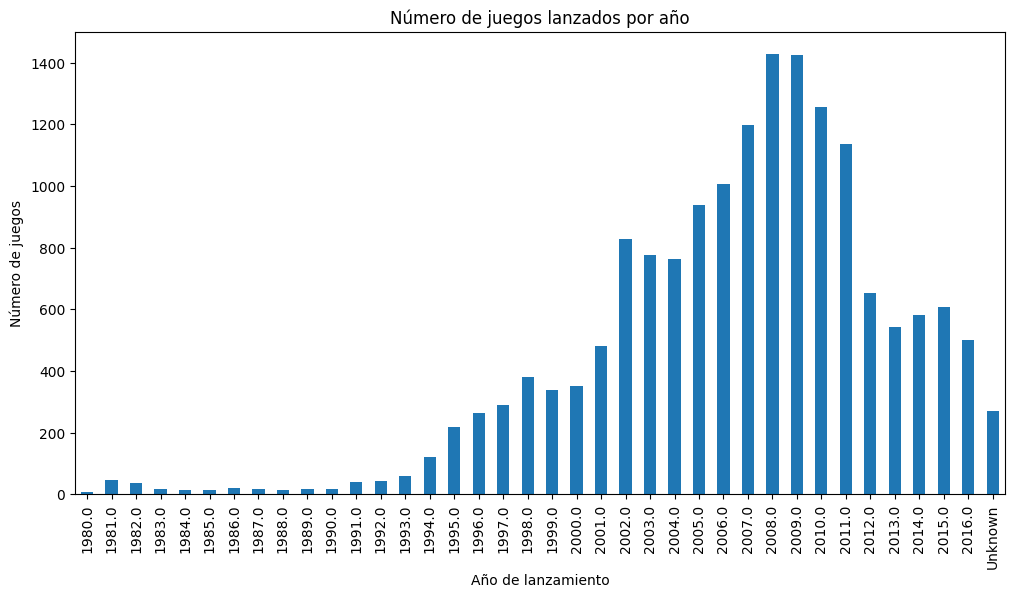

In [26]:
# ordenamos por años
games_per_year = games.groupby('year_of_release')['name'].count() 

# Visualizacion 
games_per_year.plot(kind='bar', figsize=(12, 6))
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.show()

El número de lanzamientos de juegos aumentó significativamente a partir de 1995, alcanzando su punto máximo alrededor de 2008-2010 siendo las consolas mas populares la PS3, Xbox 360 y Wii. 

### Ventas por plataforma

In [27]:
# ventas de una plataforma a otra, vemos las posibles plataformas
print(games['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.74
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


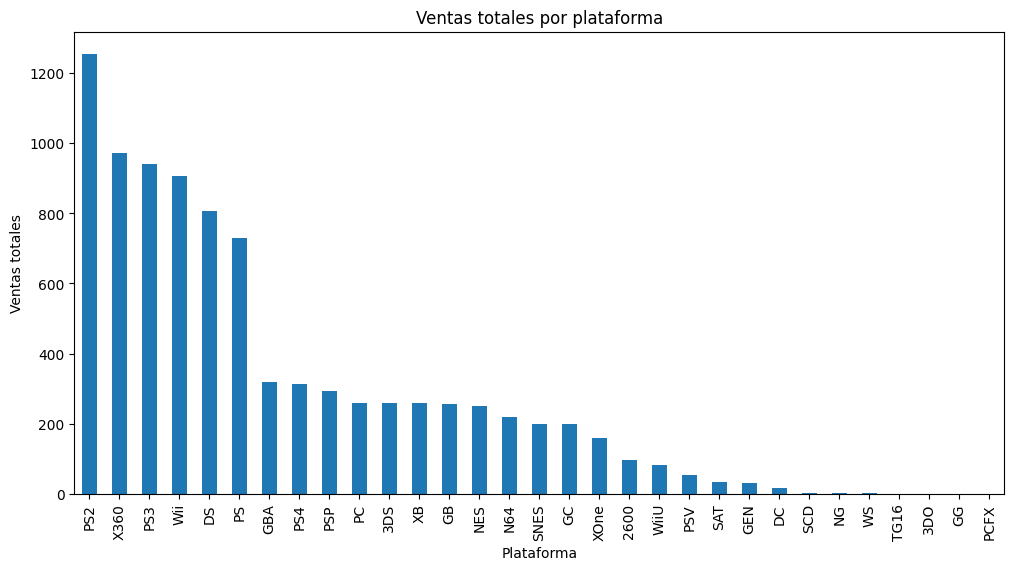

In [28]:
# mayores ventas por plataforma
sales_by_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(sales_by_platform)

# Visualizacion
sales_by_platform.plot(kind='bar', figsize=(12, 6))
plt.title('Ventas totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.show()

Las plataformas con mayores ventas son PS2, X360, PS3, Wii y DS. Estas plataformas dominaron el mercado durante varios años, especialmente PS2, que tiene las ventas más altas.

### Ventas globales por plataforma

In [29]:
# Elegimos las 5 plataformas con mayores ventas
sorted_total_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
print(sorted_total_sales.head(5))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64


In [30]:
# Distribucion por año de las plataformas de ps2, xbox360, ps3, wii y ds

# Obteniendo las plataformas
best_sellers_platforms = sorted_total_sales.head(5).index
print(best_sellers_platforms)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')


In [31]:
filtered_games = games[games['platform'].isin(best_sellers_platforms)]
print(filtered_games.sample(10))

                                                    name platform  \
6419                  Family Guy: Back to the Multiverse      PS3   
4718   James Patterson Women's Murder Club: Games of ...       DS   
8650                 Transformer: Rise of the Dark Spark     X360   
8352                                        MotoGP 09/10     X360   
4939                                  WipeOut 3 The Game      Wii   
1169             Dance Dance Revolution: Hottest Party 2      Wii   
15022  Umineko no Naku Koro ni San: Shinjitsu to Gens...      PS3   
9794                                           Conduit 2      Wii   
10311                      Grand Theft Auto: San Andreas     X360   
1152                                         Dollar Dash      PS2   

      year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
6419           2012.0      Action      0.12      0.10      0.00         0.04   
4718           2009.0   Adventure      0.15      0.22      0.00         0.05   


In [32]:
# Agrupando los datos
filtered_games = filtered_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
print(filtered_games)

   platform year_of_release  total_sales
0        DS          1985.0         0.02
1        DS          2004.0        17.27
2        DS          2005.0       130.14
3        DS          2006.0       119.81
4        DS          2007.0       146.94
..      ...             ...          ...
57     X360          2013.0        88.58
58     X360          2014.0        34.74
59     X360          2015.0        11.96
60     X360          2016.0         1.52
61     X360         Unknown        10.18

[62 rows x 3 columns]


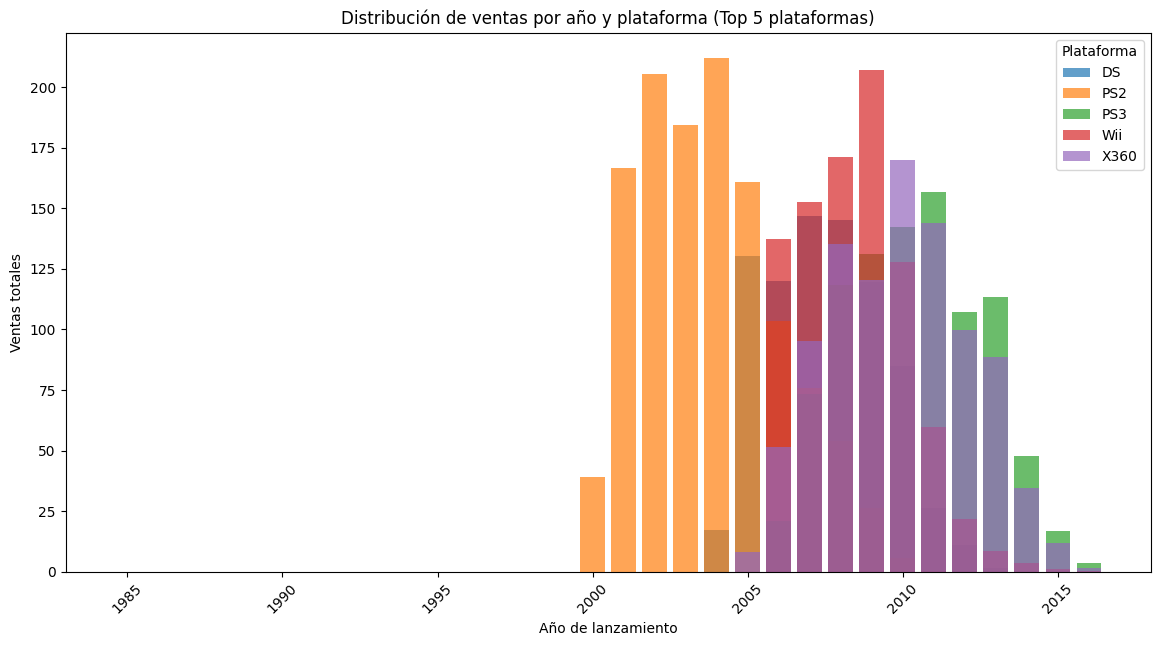

In [33]:

# Asegurar que 'year_of_release' es numérico, ademas, convertimos la columna a tipo numérico usando errors='coerce' para evitar erores
filtered_games['year_of_release'] = pd.to_numeric(filtered_games['year_of_release'], errors='coerce')

plt.figure(figsize=(14, 7))
for platform in filtered_games['platform'].unique():  # Recorre las plataformas
    subset = filtered_games[filtered_games['platform'] == platform]  # Filtra por plataforma
    plt.bar(subset['year_of_release'], subset['total_sales'], label=platform, alpha=0.7)

plt.title('Distribución de ventas por año y plataforma (Top 5 plataformas)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales')
plt.legend(title='Plataforma')
plt.xticks(rotation=45)
plt.show()

### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [34]:
# Asegurar que 'year_of_release' es numérico
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce')
platform_lifecycle = games.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifecycle['lifecycle'] = platform_lifecycle['max'] - platform_lifecycle['min']
print(platform_lifecycle.sort_values('lifecycle', ascending=False))

             min     max  lifecycle
platform                           
PC        1985.0  2016.0       31.0
DS        1985.0  2013.0       28.0
GB        1988.0  2001.0       13.0
X360      2005.0  2016.0       11.0
PSP       2004.0  2015.0       11.0
PS2       2000.0  2011.0       11.0
NES       1983.0  1994.0       11.0
DC        1998.0  2008.0       10.0
Wii       2006.0  2016.0       10.0
PS3       2006.0  2016.0       10.0
2600      1980.0  1989.0        9.0
SNES      1990.0  1999.0        9.0
PS        1994.0  2003.0        9.0
XB        2000.0  2008.0        8.0
GBA       2000.0  2007.0        7.0
GC        2001.0  2007.0        6.0
N64       1996.0  2002.0        6.0
3DS       2011.0  2016.0        5.0
PSV       2011.0  2016.0        5.0
SAT       1994.0  1999.0        5.0
WiiU      2012.0  2016.0        4.0
GEN       1990.0  1994.0        4.0
NG        1993.0  1996.0        3.0
XOne      2013.0  2016.0        3.0
PS4       2013.0  2016.0        3.0
WS        1999.0  2001.0    

### Periodo en el que se tomaran los datos
Se eligio los datos desde 2014 hasta 2017 para poder proyectar nuestra información e evitar data muy antigua.

In [35]:
relevant_data = games[(games['year_of_release'] >= 2014) & (games['year_of_release'] <= 2017)]

In [36]:
# Obteniendo las 5 plataformas principales
top_5_platforms = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index.tolist()


### Ventas globales de todos los juegos, desglosados por plataforma

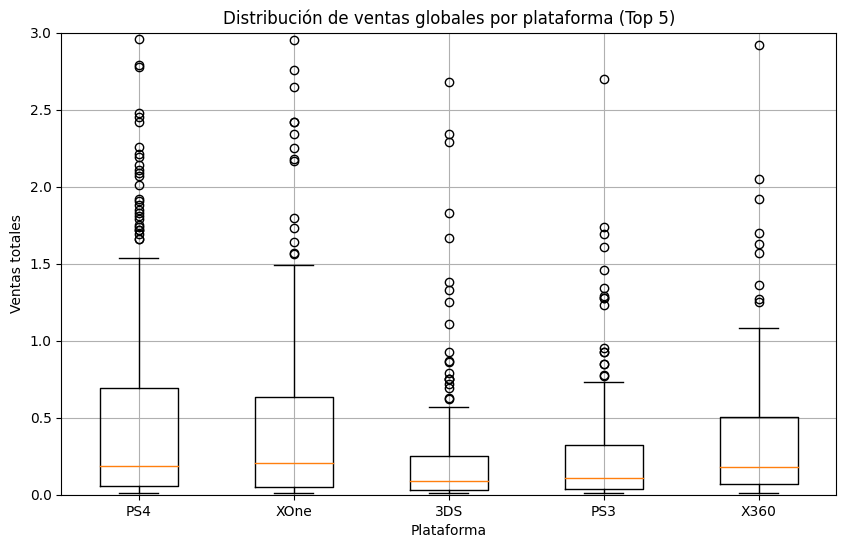

In [37]:
# Filtrar los datos para las 5 plataformas principales

filtered_data = relevant_data[relevant_data['platform'].isin(top_5_platforms)]

# Crear una lista de listas con las ventas por plataforma
ventas_por_plataforma = [filtered_data[filtered_data['platform'] == platform]['total_sales'] for platform in top_5_platforms]

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
plt.boxplot(ventas_por_plataforma, labels=top_5_platforms)
plt.title('Distribución de ventas globales por plataforma (Top 5)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.ylim(0, 3) 
plt.grid(True)
plt.show()

Las plataformas más recientes (PS4 y XOne) parecen haber tenido juegos con ventas más variadas, mientras que las más antiguas (PS3, 3DS, X360) muestran ventas más homogéneas. Además, la mayoría de los juegos tienen ventas relativamente bajas, con algunos títulos excepcionales que vendieron mucho más que el resto.

### Relación entre reseñas y ventas


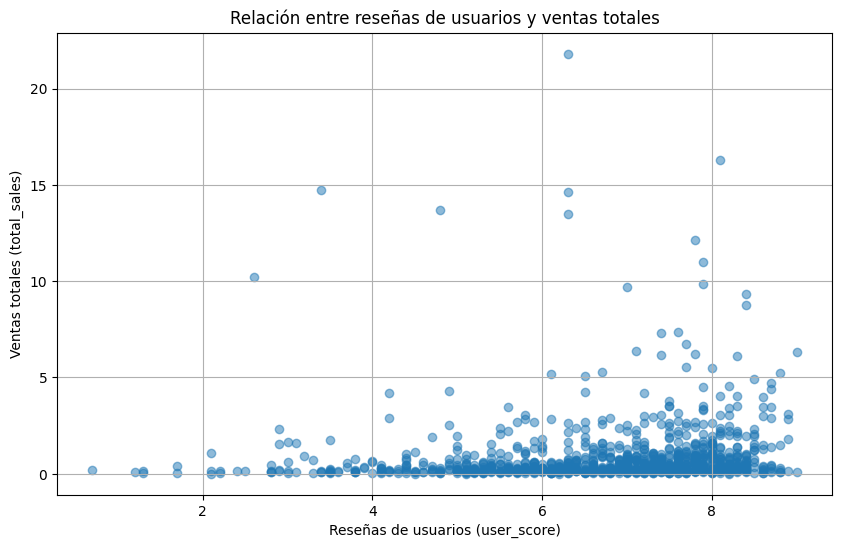

In [38]:
# Eligiendo a xbox360 como plataforma
x360_data = games[games['platform'] == 'X360']
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.scatter(x360_data['user_score'], x360_data['total_sales'], alpha=0.5)  # alpha controla la transparencia de los puntos

# Personalizar el gráfico
plt.title('Relación entre reseñas de usuarios y ventas totales')
plt.xlabel('Reseñas de usuarios (user_score)')
plt.ylabel('Ventas totales (total_sales)')
plt.grid(True)  # Agregar una cuadrícula para mejor visualización

# Mostrar el gráfico
plt.show()

In [39]:
correlation = x360_data['user_score'].corr(x360_data['total_sales'])
print("Correlación entre reseñas de usuarios y ventas:", correlation)

Correlación entre reseñas de usuarios y ventas: 0.1144588297845418


Analicé cómo las reseñas de usuarios afectan las ventas en la plataforma X360. Creé un gráfico de dispersión y calculé la correlación, que resultó ser débil (0.11). Esto sugiere que las reseñas de usuarios no tienen un impacto fuerte en las ventas.

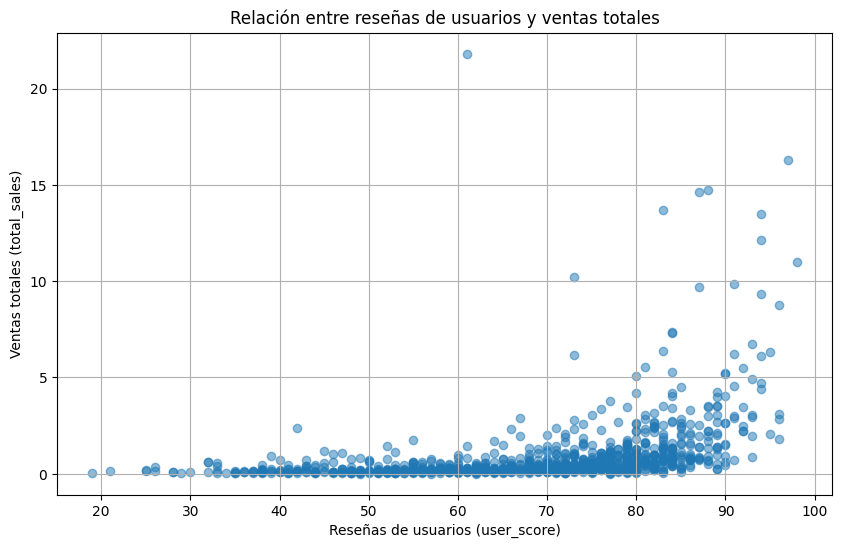

In [40]:
# Eligiendo a xbox360 como plataforma
x360_data = games[games['platform'] == 'X360']
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.scatter(x360_data['critic_score'], x360_data['total_sales'], alpha=0.5)  # alpha controla la transparencia de los puntos

# Personalizar el gráfico
plt.title('Relación entre reseñas de usuarios y ventas totales')
plt.xlabel('Reseñas de usuarios (user_score)')
plt.ylabel('Ventas totales (total_sales)')
plt.grid(True)  # Agregar una cuadrícula para mejor visualización

# Mostrar el gráfico
plt.show()

In [41]:
correlation = x360_data['critic_score'].corr(x360_data['total_sales'])
print("Correlación entre reseñas de usuarios y ventas:", correlation)

Correlación entre reseñas de usuarios y ventas: 0.3937358653072587


Los juegos con rating 'M' (Mature) generan las mayores ventas totales, superando a categorías como 'E' o 'T'. Sin embargo, esto podría estar impulsado por unos pocos títulos muy exitosos.

###  Ventas de los mismos juegos en otras plataformas. (Call of Duty)

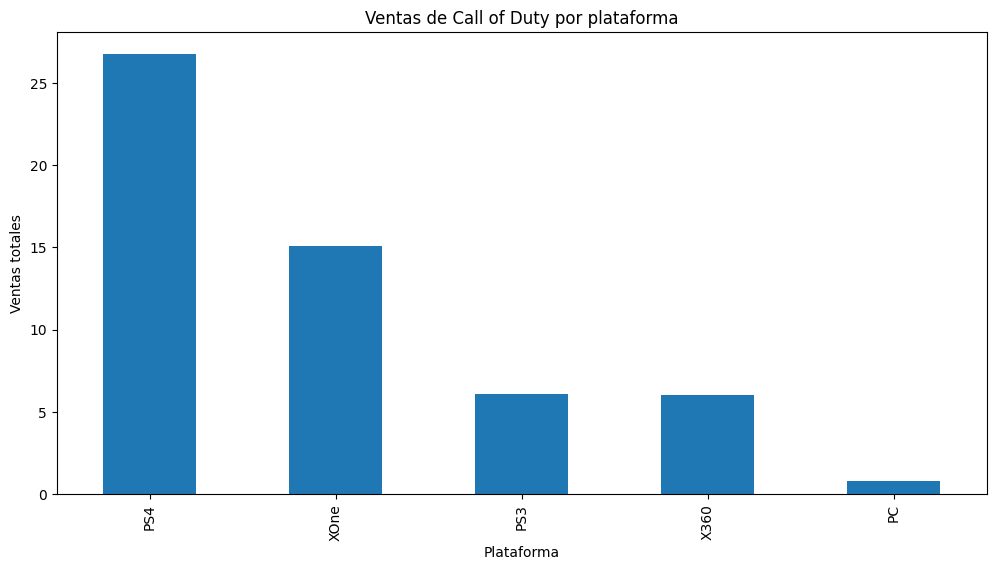

In [42]:

cod_games = relevant_data[relevant_data['name'].str.contains('Call of Duty')].groupby('platform')['total_sales'].sum().sort_values(ascending=False)
cod_games.plot(x='platform', y='total_sales', kind='bar', figsize=(12, 6))
plt.title('Ventas de Call of Duty por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.show()

genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: total_sales, dtype: float64


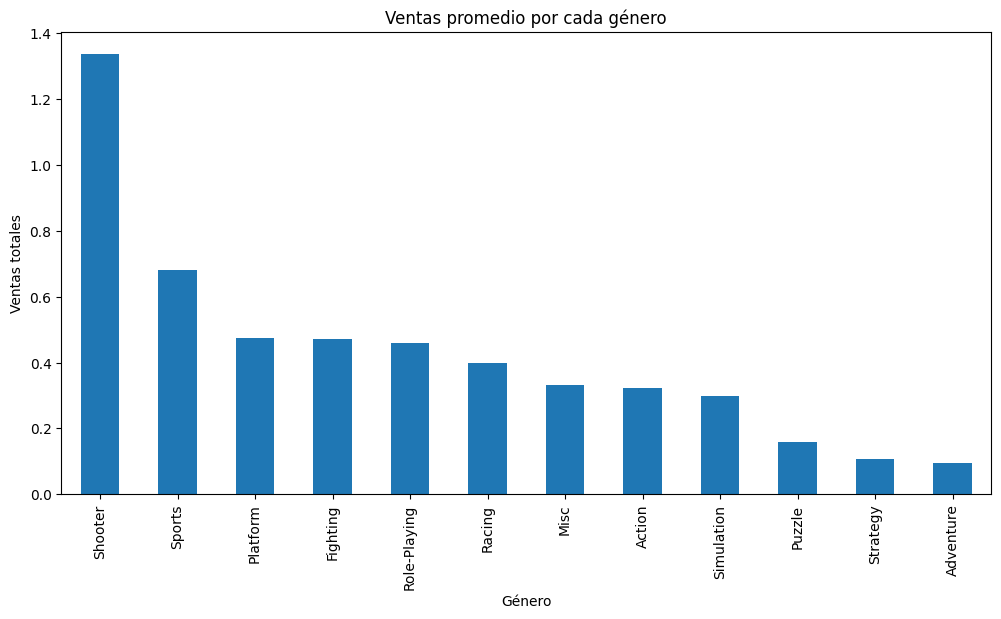

In [43]:
sales_by_genre = relevant_data.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
print(sales_by_genre)
sales_by_genre.plot(kind='bar', figsize=(12, 6))
plt.title('Ventas promedio por cada género')
plt.xlabel('Género')
plt.ylabel('Ventas totales')
plt.show()

# Perfil de usuario para cada region

### Plataformas principales en cada región (NA, EU, JP).

In [44]:
# Region NA
region_na = games.groupby('platform')['na_sales'].sum().sort_values(ascending = False)
print(region_na.head(5))

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64


In [45]:
# Region EU
region_eu = games.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)
print(region_eu.head(5))

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64


In [46]:
# Region JP
region_jp = games.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)
print(region_jp.head(5))

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


### Géneros principales por región

In [47]:
# Region NA
region_na = games.groupby('genre')['na_sales'].sum().sort_values(ascending = False)
print(region_na.head(5))

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64


In [48]:
# Region EU
region_eu = games.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)
print(region_eu.head(5))

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64


In [49]:
# Region JP
region_jp = games.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)
print(region_jp.head(5))

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


### Clasificaciones ESRB y ventas

In [50]:
# Region NA
region_na =  games.groupby('rating')['na_sales'].sum().sort_values(ascending = False)
print(region_na.head(5))

rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
Name: na_sales, dtype: float64


In [51]:
# Region EU
region_eu =  games.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)
print(region_eu.head(5))

rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
Name: eu_sales, dtype: float64


In [52]:
# Region JP
region_jp =  games.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)
print(region_jp.head(5))

rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
Name: jp_sales, dtype: float64


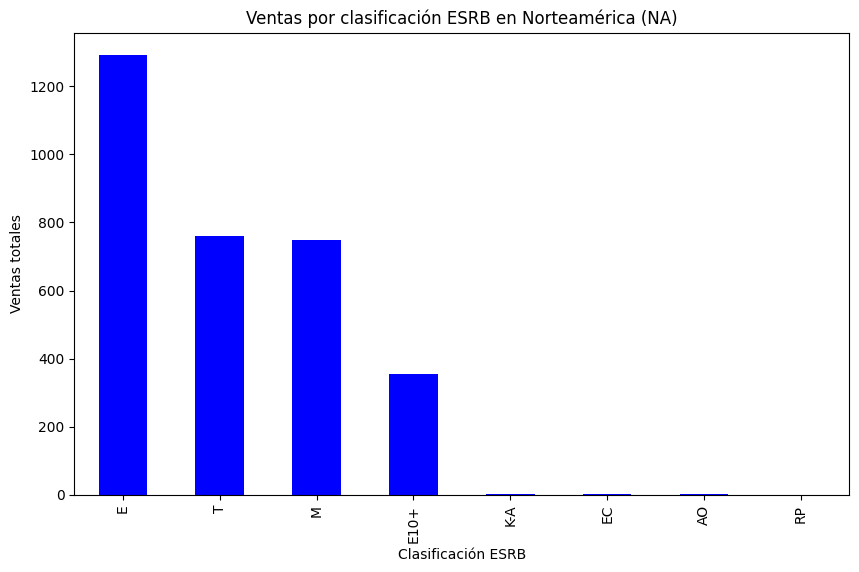

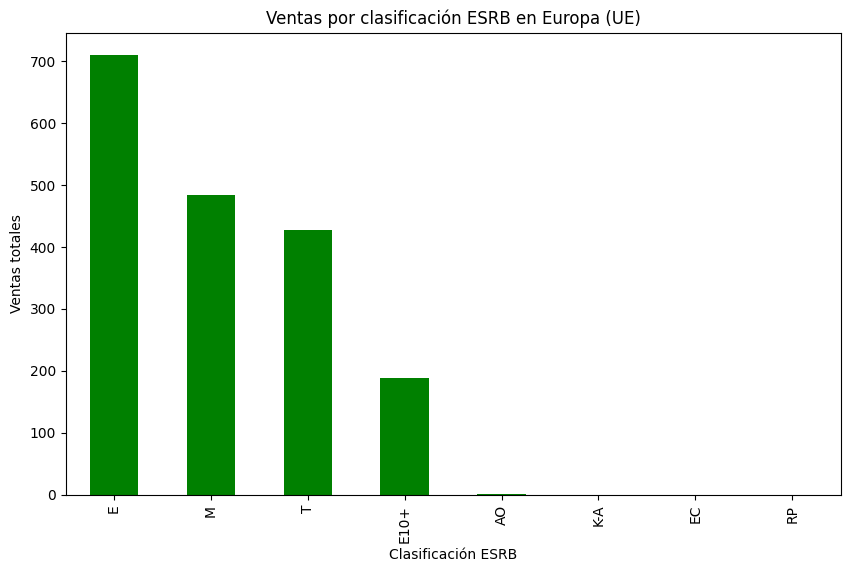

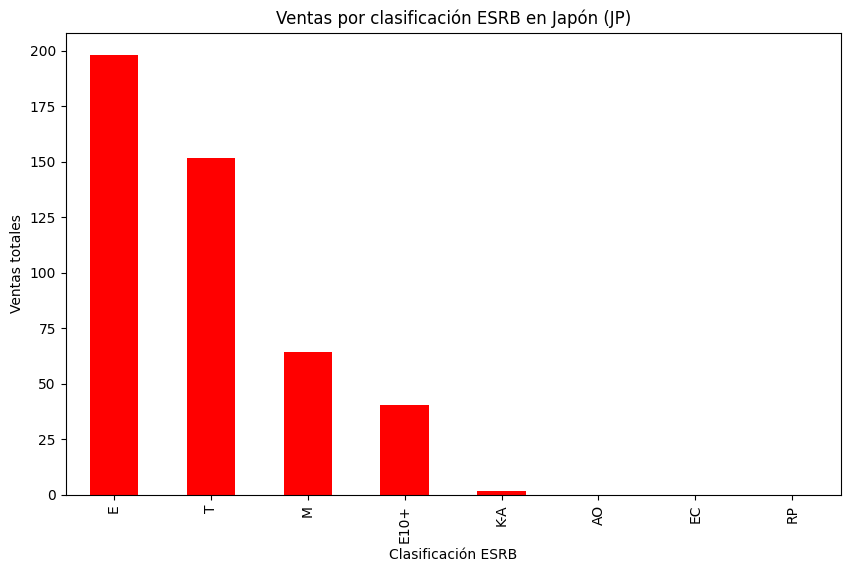

In [53]:
# Graficas
# Gráfico para NA
region_na.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Ventas por clasificación ESRB en Norteamérica (NA)')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas totales')
plt.show()

# Gráfico para EU
region_eu.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Ventas por clasificación ESRB en Europa (UE)')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas totales')
plt.show()

# Gráfico para JP
region_jp.plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Ventas por clasificación ESRB en Japón (JP)')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas totales')
plt.show()

En todas las regiones, los juegos con clasificación "E" (para todos) son los más vendidos, seguidos por "T" (adolescentes) y "M" (maduros). Esto sugiere que los juegos familiares y aptos para todos los públicos tienen un mayor alcance en el mercado.

# Pruebas de hipótesis

### Calificaciones Promedio de Usuarios: Xbox One vs PC

In [54]:
from scipy.stats import ttest_ind

# Filtrar los datos para Xbox One y PC
xbox_one_scores = games[games['platform'] == 'XOne']['user_score'].dropna()
pc_scores = games[games['platform'] == 'PC']['user_score'].dropna()

# Realizar la prueba t de dos muestras independientes
t_stat, p_value = ttest_ind(xbox_one_scores, pc_scores)

print(f"P-valor: {p_value}")
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio son las mismas.")

P-valor: 1.3896435533548819e-05
Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.


Esto indica que las calificaciones promedio de usuarios son diferentes entre estas dos plataformas. Podría ser que los juegos de PC atraen a un público más crítico o especializado, mientras que los juegos de Xbox One atraen a un público más casual.

### Calificaciones promedio de usuarios para los géneros de Acción y Deportes

In [55]:
# Filtrar los datos para los géneros de Acción y Deportes
action_scores = games[games['genre'] == 'Action']['user_score'].dropna()
sports_scores = games[games['genre'] == 'Sports']['user_score'].dropna()

# Realizar la prueba t de dos muestras independientes
t_stat, p_value = ttest_ind(action_scores, sports_scores)

print(f"P-valor: {p_value}")
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio son las mismas.")

P-valor: 0.10406951359049141
No podemos rechazar la hipótesis nula: Las calificaciones promedio son las mismas.


Esto sugiere que no hay una diferencia significativa en las calificaciones promedio entre estos dos géneros. Ambos géneros atraen a un público similar en términos de expectativas y satisfacción.


Formulación de hipótesis:

- La hipótesis nula (H₀) siempre asume que no hay diferencia entre los grupos que estamos comparando.

- La hipótesis alternativa (H₁) es lo que queremos probar, es decir, que hay una diferencia entre los grupos.

Criterio para probar las hipótesis:

- Utilizamos una prueba t de dos muestras independientes porque estamos comparando las medias de dos grupos independientes (Xbox One vs. PC, y Acción vs. Deportes).

- El p-valor nos indica la probabilidad de observar los datos si la hipótesis nula es verdadera. Si esta probabilidad es muy baja (menor que alfa = 0.05), rechazamos la hipótesis nula.

Elección del umbral alfa:

- El valor de alfa = 0.05 es un estándar común en pruebas estadísticas. Representa un 5% de riesgo de rechazar la hipótesis nula cuando en realidad es verdadera (error tipo I).

# Conclusión general

Las plataformas más rentables son PS2, X360, PS3, Wii y DS, y los géneros más rentables son Acción, Deportes y Shooter. Las preferencias de los usuarios varían significativamente entre regiones, y las clasificaciones ESRB tienen un impacto en las ventas. Además, las reseñas de usuarios no tienen un impacto fuerte en las ventas, y las calificaciones promedio de usuarios difieren entre plataformas pero no entre géneros.